5000


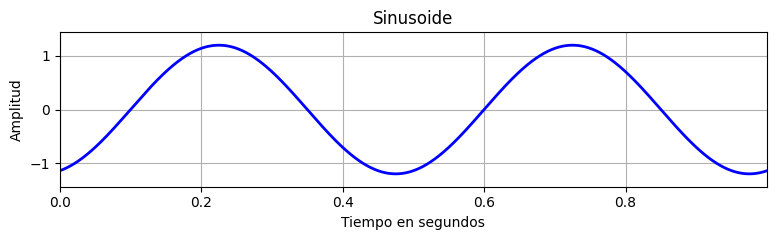

In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

def generate_sinusoid(dur=1, amp=1, freq=1, phase=0, Fs=100):
    num_samples = int(Fs * dur)
    t = np.arange(0, 1 , 1/5000)
    x = amp * np.sin(2 * np.pi * (freq * t - phase))
    print(len(t))
    return x, t

amp = 1.2
freq = 2
phase = 0.2
x, t = generate_sinusoid(dur=5, amp=amp, freq=freq, phase=phase, Fs=1000)

plt.figure(figsize=(8, 2.5))
plt.plot(t, x, color='blue', linewidth=2.0, linestyle='-')
plt.xlim([0, t[-1]])
plt.ylim([-amp*1.2, amp*1.2])
plt.xlabel('Tiempo en segundos')
plt.ylabel('Amplitud')
plt.title('Sinusoide')
plt.grid()
plt.tight_layout()

In [2]:
import IPython.display as ipd

Fs = 4000
dur = 1
x, t = generate_sinusoid(dur=dur, amp=1, freq=440, Fs=Fs)

ipd.display(ipd.Audio(x, rate=Fs))

5000


In [5]:
import IPython.display as ipd

Fs = 40
dur = 5
x, t = generate_sinusoid(dur=dur, amp=1, freq=880, Fs=Fs)

ipd.display(ipd.Audio(x, rate=Fs))

5000


<ipython-input-3-b7681e1f99b4>:32: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(t_2, x_2, linefmt='r', markerfmt='ro', basefmt='None', use_line_collection=True)
<ipython-input-3-b7681e1f99b4>:40: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(x_2, linefmt='r', markerfmt='ro', basefmt='None', use_line_collection=True)


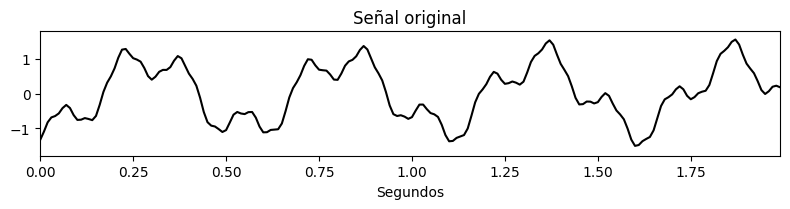

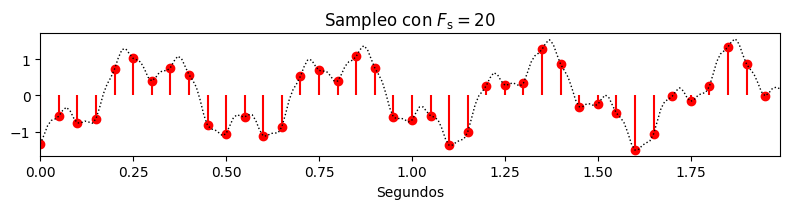

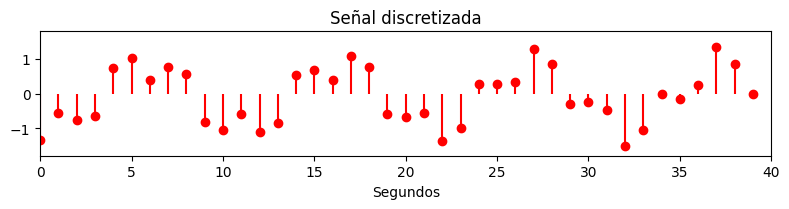

In [ ]:
def generate_example_signal(dur=1, Fs=100):
    N = int(Fs * dur)
    t = np.arange(N) / Fs
    x = 1 * np.sin(2 * np.pi * (1.9 * t - 0.3))
    x += 0.5 * np.sin(2 * np.pi * (6.1 * t - 0.1))
    x += 0.1 * np.sin(2 * np.pi * (20 * t - 0.2))
    return x, t

def sampling_equidistant(x_1, t_1, Fs_2, dur=None):
    if dur is None:
        dur = len(t_1) * t_1[1]
    N = int(Fs_2 * dur)
    t_2 = np.arange(N) / Fs_2
    x_2 = np.interp(t_2, t_1, x_1)
    return x_2, t_2

Fs_1 = 100
x_1, t_1 = generate_example_signal(Fs=Fs_1, dur=2)

Fs_2 = 20
x_2, t_2 = sampling_equidistant(x_1, t_1, Fs_2)

plt.figure(figsize=(8, 2.2))
plt.plot(t_1, x_1, 'k')
plt.title('Señal original')
plt.xlabel('Segundos')
plt.ylim([-1.8, 1.8])
plt.xlim([t_1[0], t_1[-1]])
plt.tight_layout()

plt.figure(figsize=(8, 2.2))
plt.stem(t_2, x_2, linefmt='r', markerfmt='ro', basefmt='None', use_line_collection=True)
plt.plot(t_1, x_1, 'k', linewidth=1, linestyle='dotted')
plt.title(r'Sampleo con $F_\mathrm{s} = %.0f$' % Fs_2)
plt.xlabel('Segundos')
plt.xlim([t_1[0], t_1[-1]])
plt.tight_layout()

plt.figure(figsize=(8, 2.2))
plt.stem(x_2, linefmt='r', markerfmt='ro', basefmt='None', use_line_collection=True)
plt.title(r'Señal discretizada')
plt.xlabel('Segundos')
plt.ylim([-1.8, 1.8])
plt.xlim([0, len(t_2)])
plt.tight_layout()

<ipython-input-4-10b763b507ec>:11: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(t_2, x_2, linefmt='r:', markerfmt='r.', basefmt='None', label='Samples', use_line_collection=True)


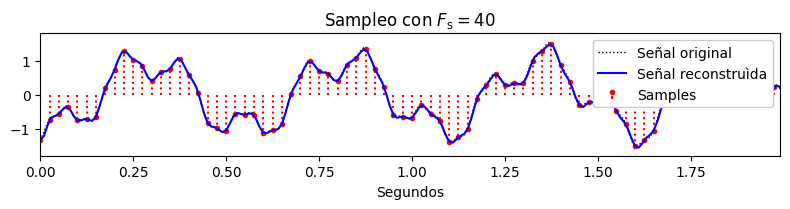

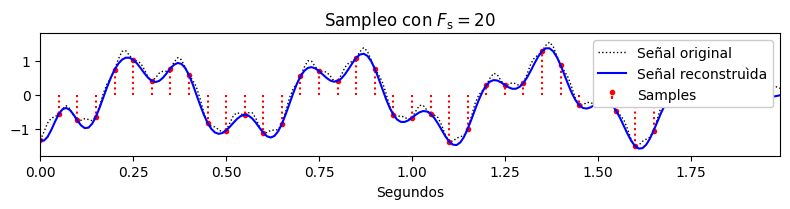

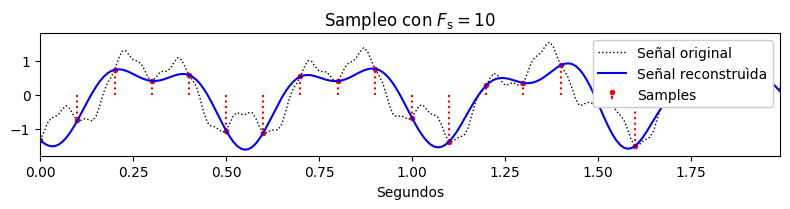

In [ ]:
def reconstruction_sinc(x, t, t_sinc):
    Fs = 1 / t[1]
    x_sinc = np.zeros(len(t_sinc))
    for n in range(0, len(t)):
        x_sinc += x[n] * np.sinc(Fs * t_sinc - n)
    return x_sinc

def plot_signal_reconstructed(t_1, x_1, t_2, x_2, t_sinc, x_sinc, figsize=(8, 2.2)):
    plt.figure(figsize=figsize)
    plt.plot(t_1, x_1, 'k', linewidth=1, linestyle='dotted', label='Señal original')
    plt.stem(t_2, x_2, linefmt='r:', markerfmt='r.', basefmt='None', label='Samples', use_line_collection=True)
    plt.plot(t_sinc, x_sinc, 'b', label='Señal reconstruìda')
    plt.title(r'Sampleo con $F_\mathrm{s} = %.0f$' % (1/t_2[1]))
    plt.xlabel('Segundos')
    plt.ylim([-1.8, 1.8])
    plt.xlim([t_1[0], t_1[-1]])
    plt.legend(loc='upper right', framealpha=1)
    plt.tight_layout()
    plt.show()

Fs_2 = 40
x_2, t_2 = sampling_equidistant(x_1, t_1, Fs_2)
t_sinc = t_1
x_sinc = reconstruction_sinc(x_2, t_2, t_sinc)
plot_signal_reconstructed(t_1, x_1, t_2, x_2, t_sinc, x_sinc)

Fs_2 = 20
x_2, t_2 = sampling_equidistant(x_1, t_1, Fs_2)
t_sinc = t_1
x_sinc = reconstruction_sinc(x_2, t_2, t_sinc)
plot_signal_reconstructed(t_1, x_1, t_2, x_2, t_sinc, x_sinc)

Fs_2 = 10
x_2, t_2 = sampling_equidistant(x_1, t_1, Fs_2)
t_sinc = t_1
x_sinc = reconstruction_sinc(x_2, t_2, t_sinc)
plot_signal_reconstructed(t_1, x_1, t_2, x_2, t_sinc, x_sinc)

https://pure.rug.nl/ws/portalfiles/portal/3266731/c2.pdf